In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# matplotlib 한글화

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [33]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


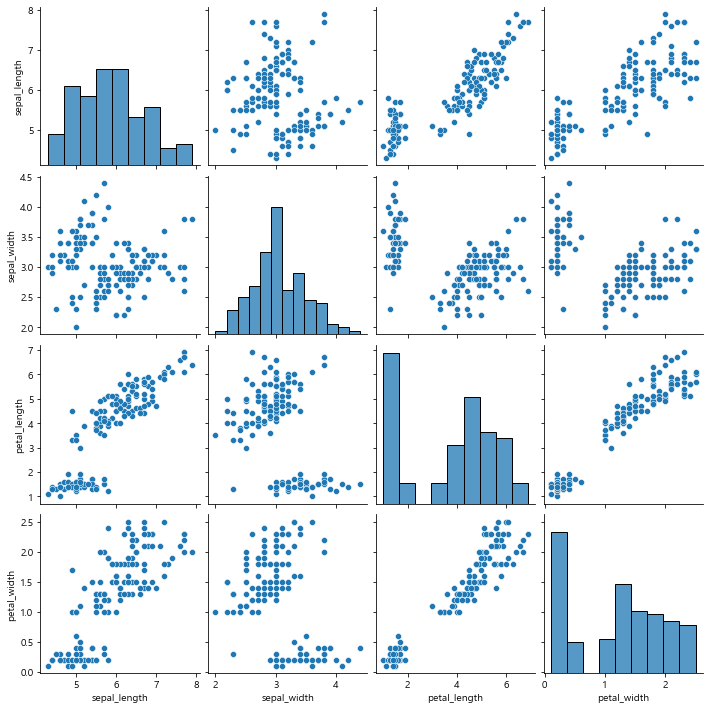

In [6]:
sns.pairplot(df)

In [8]:
y = df.species
x = df.drop('species', axis=1)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=777)

In [12]:
1/x.shape[1]

0.25

In [15]:
from sklearn.svm import SVC
svc = SVC(C=0.5, gamma=100)  # SVC(C = 1, gamma = 'auto') auto : 1/x.data.shape[1]

In [17]:
svc.fit(x_train, y_train)

SVC(C=1, gamma='auto')

In [18]:
preds = svc.predict(x_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00         7
   virginica       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# model optimization

In [27]:
from sklearn.model_selection import GridSearchCV

In [31]:
params = {'C':[0.1,1,10,100],'gamma':[1, 0.1, 0.01, 0.001]}

In [29]:
grid = GridSearchCV(SVC(), param_grid=params, refit=True, verbose=True)

In [32]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=True)

In [33]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [35]:
grid.best_score_

0.975

In [36]:
svc = SVC(C=100, gamma=0.01)

In [37]:
svc.fit(x_train, y_train)

SVC(C=100, gamma=0.01)

In [38]:
preds = svc.predict(x_test)

In [39]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.86      0.92         7
   virginica       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

